In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
from time import process_time
from sklearn.preprocessing    import  StandardScaler

# Importing Data

In [2]:
dataset =pd.read_csv('./Datasets/dataset_cleaned.csv')
data = dataset.copy()
data

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label_Num,Cat_Num,Sub_Cat_Num
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,1,1,5
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,1,3,3
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,1,2,6
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,1,1,2
4,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625410,277,1,1,18.0,18.0,18.0,18.0,18.0,0.000000,18.0,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,1,1,1
625411,1658,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,1,3,3
625412,77,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,1,2,6
625413,240,2,1,2776.0,1388.0,1388.0,1388.0,1388.0,0.000000,1388.0,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,0,0,0


# Variance method - Feature Selection

Removing features that show the same value for the majority/all of the observations (constant/quasi-constant features)

In [3]:
def constant_feature_detect(data,threshold=0.98):

   
    quasi_constant_feature = []
    for feature in data.columns:
        predominant = (data[feature].value_counts() / np.float(
                      len(data))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature),' variables are found to be almost constant')    
    return quasi_constant_feature


# the original dataset has no constant variable
quasi_constant_feature = constant_feature_detect(data=data,threshold=0.9)

<ipython-input-3-312de7e45ef2>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predominant = (data[feature].value_counts() / np.float(


26  variables are found to be almost constant


In [4]:
quasi_constant_feature

['Fwd_Pkt_Len_Std',
 'Bwd_IAT_Std',
 'Fwd_PSH_Flags',
 'Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkts/b_Avg',
 'Bwd_Blk_Rate_Avg',
 'Init_Fwd_Win_Byts',
 'Fwd_Seg_Size_Min',
 'Active_Mean',
 'Active_Std',
 'Active_Max',
 'Active_Min',
 'Label_Num']

In [5]:
data.drop(quasi_constant_feature,axis=1,inplace=True)

In [8]:
#Divided by Label_Num
X         = dataset.iloc[:,:-3]
Y         = np.array(dataset.iloc[:,-3])
Y         = Y.reshape(len(Y),1)
#Datasette Label_Num'ın konumuna dikkat!!!

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
Y_train = Y_train.reshape(len(Y_train),1)
Y_test  = Y_test.reshape(len(Y_test),1)

# Standard Scaler

In [10]:
SCALE_IN  = StandardScaler()
SCALE_IN.fit(X_train)
X_train = SCALE_IN.transform(X_train)
X_test  = SCALE_IN.transform(X_test)

# Build Artificial Neural Network (ANN)

In [11]:
input_dimension = 122
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=input_dimension,kernel_initializer='RandomNormal',activation='relu'))      
model.add(tf.keras.layers.Dense(units=128,kernel_initializer='RandomNormal',activation='relu')) 
model.add(tf.keras.layers.Dense(units=256,kernel_initializer='RandomNormal',activation='relu'))                     
model.add(tf.keras.layers.Dense(units=520,kernel_initializer='RandomNormal',activation='relu')) 
model.add(tf.keras.layers.Dense(units=1024,kernel_initializer='RandomNormal',activation='relu'))                     
 
model.add(tf.keras.layers.Dense(units=10,kernel_initializer='RandomNormal',activation='relu'))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))                   

model.compile(tf.keras.optimizers.Adam(lr=0.001, decay=0.0001), loss = 'binary_crossentropy', metrics =['accuracy'])





# Model Training

In [ ]:
t1_start = process_time() 
history = model.fit(X_train, Y_train,batch_size=256, epochs = 10, validation_data=(X_test, Y_test),shuffle=True)
t1_stop = process_time()
print("time:", t1_stop-t1_start)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 122)               9394      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               15744     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 520)               133640    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              533504    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

# Model Output

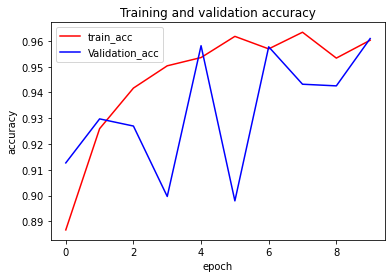

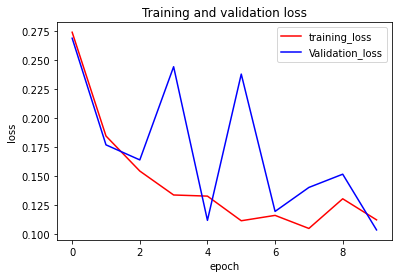

0.9633742570877075
0.9609224796295166


In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='train_acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='training_loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

print(np.max(history.history['accuracy']))
print(np.max(history.history['val_accuracy']))

In [13]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    # np.set_printoptions(precision=2)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{0:.4f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
    
    #Roc


def plot_roc_curve(Y_test, Y_pred, nb_classes, class_index, title='Receiver operating characteristic'):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(nb_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(Y_test[:, i], Y_pred[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), Y_pred.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
    
    #plt.figure()
    lw = 2
    plt.plot(fpr[class_index], tpr[class_index], color='darkorange',
             lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[class_index])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    
    #epoch history
    



-----------------------------------------------------------------------------------------------------
Testing accuracy...
-----------------------------------------------------------------------------------------------------
0.9609224855861627
-----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2365
           1       0.97      0.95      0.96      2318

    accuracy                           0.96      4683
   macro avg       0.96      0.96      0.96      4683
weighted avg       0.96      0.96      0.96      4683

-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
TP: 2211 FP: 107 TN: 2289 FN: 76
-------------------------------------------------------------------------------------------

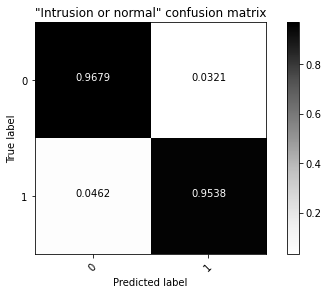

In [14]:
Y_pred = model.predict(X_test);
print('-----------------------------------------------------------------------------------------------------')
print('Testing accuracy...')
print('-----------------------------------------------------------------------------------------------------')
score2 = accuracy_score(Y_test, np.around(Y_pred))
print(score2)
print('-----------------------------------------------------------------------------------------------------')
print(classification_report(Y_test, np.around(Y_pred)))
print('-----------------------------------------------------------------------------------------------------')

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==0:
           TN += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

TP, FP, TN, FN = perf_measure(np.around(Y_pred), Y_test)

fp_rate = FP/(TN+FP)
tn_rate = TN/(TN+FP)

accuracy = (TN+TP)/(TN+FP+TP+TN)
precision = TP/(TN+FP)
hitrate = TP/(TN+FN)

print('-----------------------------------------------------------------------------------------------------')
print('TP:', TP, 'FP:', FP, 'TN:', TN, 'FN:', FN)
print('-----------------------------------------------------------------------------------------------------')
print('Accuracy:', accuracy)
print('-----------------------------------------------------------------------------------------------------')
print('False Positive rate:', fp_rate, 'True Negative Rate', tn_rate)

print('-----------------------------------------------------------------------------------------------------')

plot_confusion_matrix(Y_test, np.round(Y_pred), classes=list(range(2)),
                           normalize=True,
                         title='"Intrusion or normal" confusion matrix')
